# Exploratory Data Analysis (EDA)
This notebook explores the dataset using descriptive statistics and visualizations.

In [ ]:
!pip install jsonlines
import jsonlines

file_path = "../processed_data/python/processed_train.jsonl"
data = []

with jsonlines.open(file_path) as reader:
    for obj in reader:
        data.append(obj)

print(f"Total records: {len(data)}")
print("Sample Record:")
print(data[0])

Total records: 36373
Sample Record:
{'idx': 0, 'query': 'print(((eval(input().replace(*" *")) % 3 % 2 * "Imp" or "P") + "ossible"))', 'reference': 'print(f"{eval(input().replace(*\' *\'))%3%2*\'Imp\'or\'P\'}ossible")', 'query_abs': ['print', '(', '(', 'eval', '(', 'input', '(', ')', '.', 'replace', '(', '*', "'STR'", ')', ')', '%', "'NUM'", '%', "'NUM'", '*', "'STR'", 'or', "'STR'", ')', '+', "'STR'", ')', '', ''], 'edit_code_abs': ['print', '(', '(', 'eval', '(', 'input', '(', ')', '.', 'replace', '(', '*', "'STR'", ')', ')', '%', "'NUM'", '%', "'NUM'", '*', "'STR'", 'or', "'STR'", ')', '+', "'STR'", ')'], 'edit_opt_abs': ['print', '(', 'f"{eval(input().replace(*\'STR\'))', '%', "'NUM'", '%', "'NUM'", '*', "'STR'", 'or', '\'STR\'}STR"', ')']}


In [ ]:
keys = data[0].keys()
print("Keys in each record:")
print(keys)

Keys in each record:
dict_keys(['idx', 'query', 'reference', 'query_abs', 'edit_code_abs', 'edit_opt_abs'])


In [ ]:
from collections import Counter

key_counts = Counter(key for record in data for key in record.keys())
print("Key Distribution:")
for key, count in key_counts.items():
    print(f"{key}: {count}")

Key Distribution:
idx: 36373
query: 36373
reference: 36373
query_abs: 36373
edit_code_abs: 36373
edit_opt_abs: 36373


  Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.8 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.0 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp310-cp310-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 39.5 MB/s eta 0:00:00
Using cached pillow-11.0.0-cp310-cp310-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


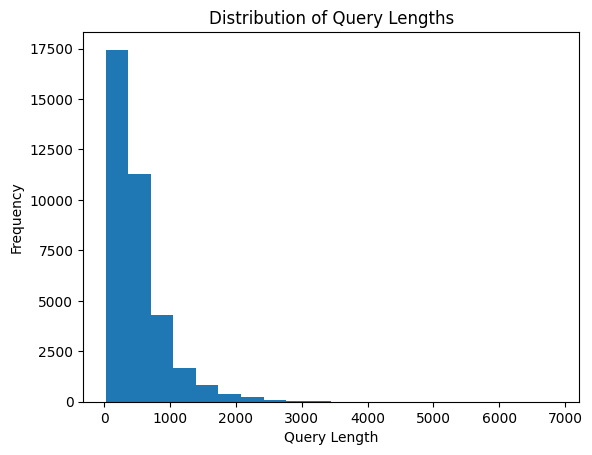

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

query_lengths = [len(record['query']) for record in data if 'query' in record]
plt.hist(query_lengths, bins=20)
plt.title("Distribution of Query Lengths")
plt.xlabel("Query Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
queries = [record['query'] for record in data if 'query' in record]
print("Sample Queries:")
for i, query in enumerate(queries[:5], start=1):
    print(f"{i}: {query}")

Sample Queries:
1: print(((eval(input().replace(*" *")) % 3 % 2 * "Imp" or "P") + "ossible"))
2: from itertools import product
N = int(eval(input()))
A = []
XY = [[] for _ in range(N)]
for i in range(N):
    A.append(int(eval(input())))
    for j in range(A[i]):
        XY[i].append(list(map(int, input().split())))
ans = 0
for pattern in product(list(range(2)), repeat=N):  
    flag = True
    for i in range(N):
        if pattern[i]:  
            for a in range(A[i]):
                if pattern[XY[i][a][0] - 1] != XY[i][a][1]:
                    flag = False
                    break
    if flag:
        ans = max(ans, sum(pattern))
print(ans)
3: import sys
import numpy as np
from functools import lru_cache
from collections import deque
H, W = list(map(int, input().split()))
grid = [list(eval(input())) for i in range(H)]
dp = [[0] * (W + 1) for i in range(H + 1)]
dp[0][0] = 1
mod = (10**9) + 7
for i in range(H):
    for j in range(W):
        if i > 0 or j > 0:
            if grid[i